In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

In [6]:
def get_standings_for_date(year:int, month:int, day:int, league:str) -> pd.DataFrame:
    """returns cleaned up pandas DataFrame of the standings table from bref (https://www.baseball-reference.com/boxes)"""
    bref_record_url = (f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&'
                       f'url=%2Fboxes%2F%3Fmonth%3D{month}%26day%3D{day}%26year%3D{year}&div=div_standings-upto-{league}-overall')
    df = pd.read_html(bref_record_url)[0]
    df = df.apply(partial(pd.to_numeric, errors='ignore'))
    df['league'] = league
    df['year'] = year
    df['month'] = month
    df['day'] = day
    return df

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.5)

In [23]:
# test our data gathering function
get_standings_for_date(2002,6,1,'AL')

,Tm,W,L,W-L%,GB,RS,RA,pythW-L%,league,year,month,day
0,BOS,36,16,0.692,--,291,205,0.655,AL,2002,6,1
1,NYY,37,19,0.661,1.0,319,216,0.671,AL,2002,6,1
2,SEA,34,20,0.630,3.0,302,234,0.615,AL,2002,6,1
3,ANA,30,22,0.577,6.0,294,222,0.626,AL,2002,6,1
4,MIN,32,24,0.571,6.0,285,273,0.520,AL,2002,6,1
5,CHW,28,27,0.509,9.5,300,293,0.511,AL,2002,6,1
6,CLE,27,28,0.491,10.5,226,251,0.452,AL,2002,6,1
7,OAK,26,28,0.481,11.0,259,288,0.452,AL,2002,6,1
8,BAL,25,28,0.472,11.5,242,247,0.491,AL,2002,6,1
9,TEX,22,31,0.415,14.5,244,274,0.447,AL,2002,6,1


In [24]:
def get_al_nl_standings_for_date(year, month, day):
    return pd.concat([ get_standings_for_date(year,month,day,lg) for lg in ['AL', 'NL'] ])

In [25]:
df = pd.concat([ get_al_nl_standings_for_date(yr, 6, 1) for yr in [2021,2022]])

In [26]:
plot_df= df.pivot(index='Tm', columns='year', values='W-L%')\
  .reset_index()\
  .rename({2021:'_2021', 2022: '_2022'}, axis=1)

In [27]:
# lets take a look
plot_df

year,Tm,_2021,_2022
0,ARI,0.357,0.481
1,ATL,0.481,0.471
2,BAL,0.327,0.423
3,BOS,0.593,0.471
4,CHC,0.574,0.420
5,CHW,0.600,0.479
6,CIN,0.453,0.347
7,CLE,0.556,0.478
8,COL,0.382,0.460
9,DET,0.418,0.400


In [28]:
plt.xkcd()

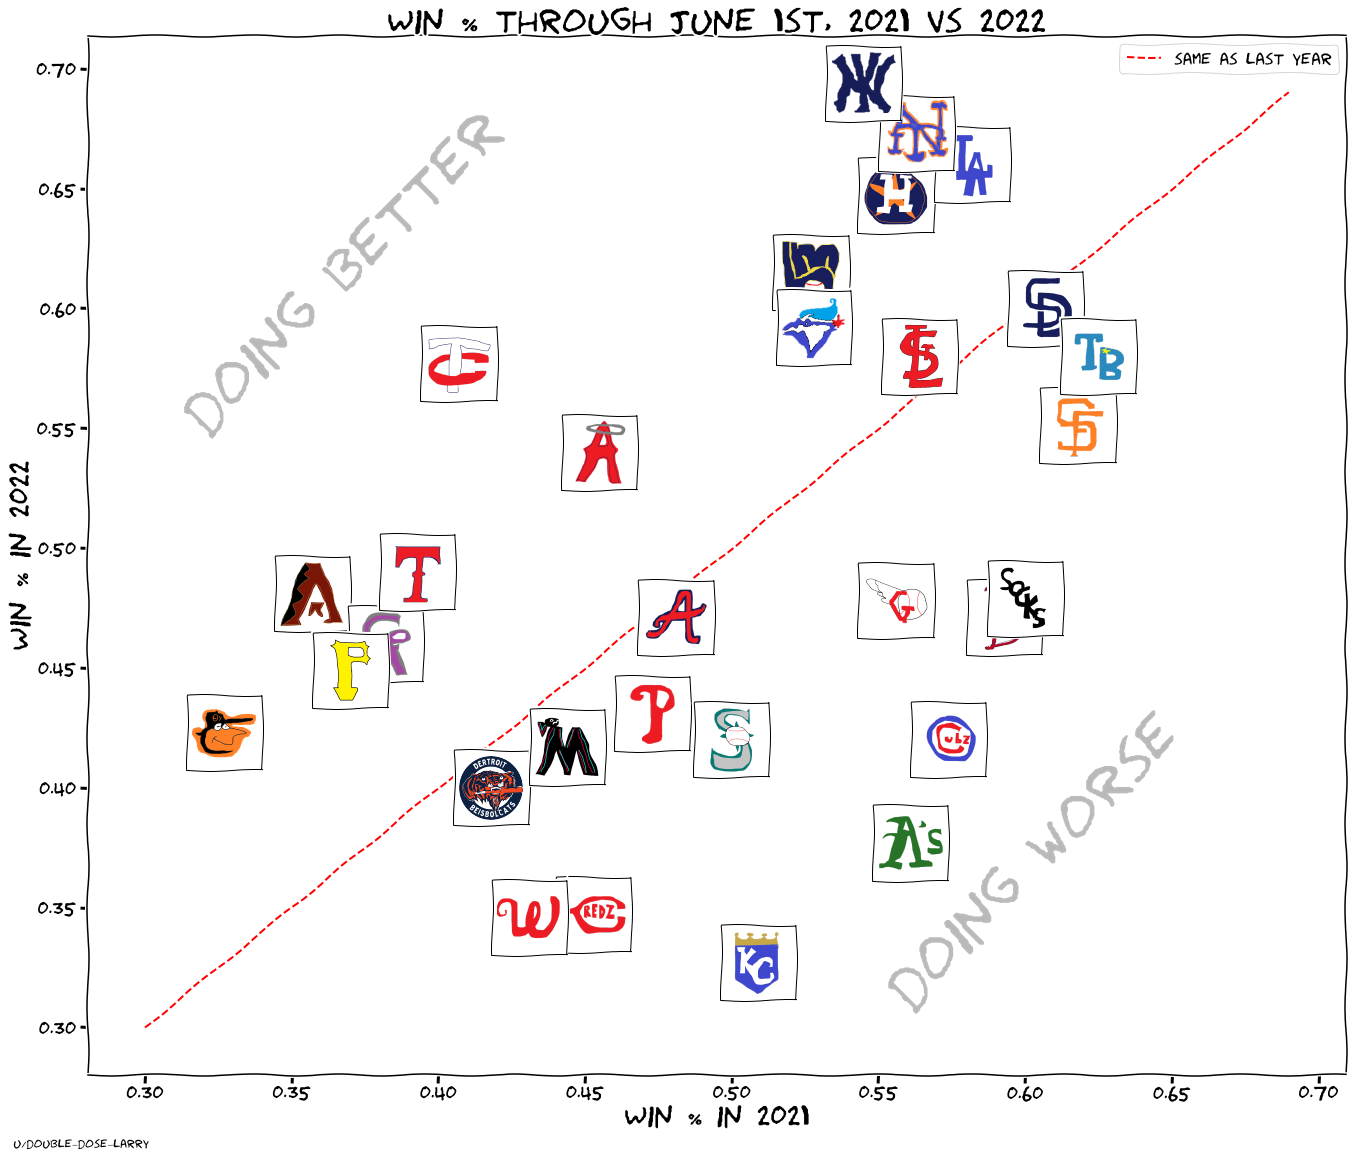

In [29]:
f, ax = plt.subplots(figsize=(19,16))

x = plot_df._2021
y = plot_df._2022
line_range = np.arange(0.3, 0.7, 0.01)

ax.scatter(x,y)
ax.plot(line_range, line_range, label="same as last year", c="r", ls="--")

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Tm}.png'),
                      (tm._2, tm._3),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

# annotate better
ax.annotate(
    s="doing better",
    xy=(0.31, 0.55),
    size=60,
    rotation=45,
    alpha=0.15
)

# annotate worse
ax.annotate(
    s="doing worse",
    xy=(0.55, 0.31),
    size=60,
    rotation=45,
    alpha=0.15
)

# font size
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.legend(fontsize='large')

# labels
plt.xlabel("Win % in 2021", size=30)
plt.ylabel("Win % in 2022", size=30)
plt.title("Win % through June 1st, 2021 vs 2022", size=35)
plt.tight_layout()
#sign
plt.annotate('u/double_dose_larry',
            xy=(.01, .01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
plt.savefig('win_pct_2021_2022.png')